In [1]:
# Adapted from https://github.com/amueller/scipy-2017-sklearn/
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Unsupervised Learning -- Clustering

Clustering is the task of gathering samples into groups of similar
samples according to some predefined similarity or distance (dissimilarity)
measure, such as the Euclidean distance.

<img width="60%" src='img/clustering.png'/>

In this section we will explore a basic clustering task on some synthetic and real-world datasets.

Ccommon applications of clustering algorithms:

- Compression for data reduction
- Finding similar news/articles/links
- Grouping related stock quotes for investment portfolio management
- Building customer profiles for market analysis


Let's start by creating a simple, 2-dimensional, synthetic dataset:

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
X.shape

(100, 2)

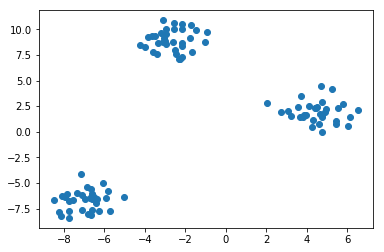

In [3]:
plt.scatter(X[:, 0], X[:, 1]);

In the scatter plot above, we can see three separate groups of data points and we would like to recover them using clustering -- think of "discovering" the class labels that we already take for granted in a classification task.

Even if the groups are obvious in the data, it is hard to find them when the data lives in a high-dimensional space, which we can't visualize in a single histogram or scatterplot.

Now we will use one of the simplest clustering algorithms, K-means.
This is an iterative algorithm which searches for three cluster
centers such that the distance from each point to its cluster is
minimized. The standard implementation of K-means uses the Euclidean distance, which is why we want to make sure that all our variables are measured on the same scale if we are working with real-world datastets. 

<br/>
<div class="alert alert-success">
    <b>Question</b>:
     <ul>
      <li>
      what would you expect the output to look like?
      </li>
    </ul>
</div>

In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)

We can get the cluster labels either by calling fit and then accessing the 
``labels_`` attribute of the K means estimator, or by calling ``fit_predict``.
Either way, the result contains the ID of the cluster that each point is assigned to.

In [5]:
labels = kmeans.fit_predict(X)

In [6]:
labels

array([1, 0, 2, 0, 1, 0, 2, 0, 0, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1,
       1, 2, 2, 2, 0, 1, 1, 1, 1, 0, 0, 1, 2, 2, 2, 2, 0, 0, 1, 2, 0, 2,
       2, 0, 1, 1, 1, 0, 0, 0, 2, 1, 1, 1, 2, 2, 0, 2, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 2, 0, 1, 0, 1, 0, 0, 2, 0, 2, 1, 2, 2, 2, 0,
       2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 1, 2])

In [7]:
y

array([2, 1, 0, 1, 2, 1, 0, 1, 1, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2,
       2, 0, 0, 0, 1, 2, 2, 2, 2, 1, 1, 2, 0, 0, 0, 0, 1, 1, 2, 0, 1, 0,
       0, 1, 2, 2, 2, 1, 1, 1, 0, 2, 2, 2, 0, 0, 1, 0, 2, 1, 2, 1, 2, 2,
       1, 2, 1, 1, 1, 2, 2, 0, 1, 2, 1, 2, 1, 1, 0, 1, 0, 2, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 2, 0])

In [8]:
np.all(y == labels)

False

Let's visualize the assignments that have been found

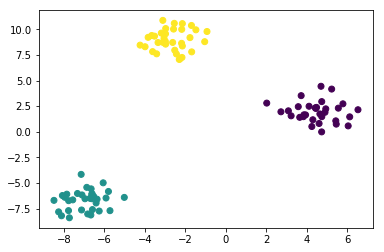

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=labels);

Compared to the true labels:

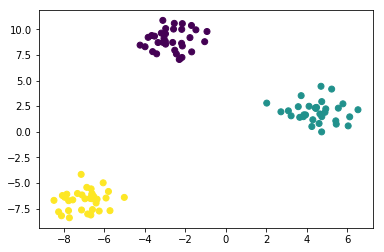

In [10]:
plt.scatter(X[:, 0], X[:, 1], c=y);

Here, we are probably satisfied with the clustering results. But in general we might want to have a more quantitative evaluation. How about comparing our cluster labels with the ground truth we got when generating the blobs?

In [11]:
kmeans.cluster_centers_

array([[ 4.49951001,  1.93892013],
       [-6.95170962, -6.67621669],
       [-2.66780392,  8.93576069]])

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score

print('Accuracy score:', accuracy_score(y, labels))
print(confusion_matrix(y, labels))

Accuracy score: 0.0
[[ 0  0 34]
 [33  0  0]
 [ 0 33  0]]


In [13]:
np.mean(y == labels)

0.0

<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
      <li>
      After looking at the "True" label array y, and the scatterplot and `labels` above, can you figure out why our computed accuracy is 0.0, not 1.0, and can you fix it?
      </li>
    </ul>
</div>

Even though we recovered the partitioning of the data into clusters perfectly, the cluster IDs we assigned were arbitrary,
and we can not hope to recover them. Therefore, we must use a different scoring metric, such as ``adjusted_rand_score``, which is invariant to permutations of the labels:

In [14]:
from sklearn.metrics import adjusted_rand_score

adjusted_rand_score(y, labels)

1.0

One of the "short-comings" of K-means is that we have to specify the number of clusters, which we often don't know *apriori*. For example, let's have a look what happens if we set the number of clusters to 2 in our synthetic 3-blob dataset:

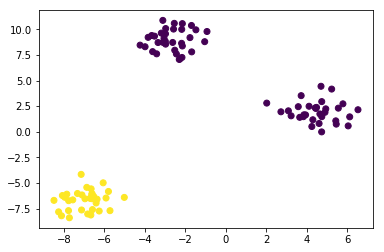

In [15]:
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels);

In [16]:
kmeans.cluster_centers_

array([[ 0.86236563,  5.48955564],
       [-6.95170962, -6.67621669]])

#### The Elbow Method

The Elbow method is a "rule-of-thumb" approach to finding the optimal number of clusters. Here, we look at the cluster dispersion for different values of k:

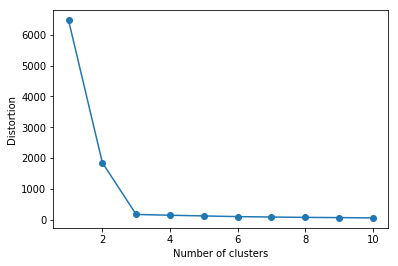

In [17]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

Then, we pick the value that resembles the "pit of an elbow." As we can see, this would be k=3 in this case, which makes sense given our visual expection of the dataset previously.

**Clustering comes with assumptions**: A clustering algorithm finds clusters by making assumptions with samples should be grouped together. Each algorithm makes different assumptions and the quality and interpretability of your results will depend on whether the assumptions are satisfied for your goal. For K-means clustering, the model is that all clusters have equal, spherical variance.

**In general, there is no guarantee that structure found by a clustering algorithm has anything to do with what you were interested in**.


We can easily create a dataset that has non-isotropic clusters, on which kmeans will fail:

Text(0.5,1,'Unevenly Sized Blobs')

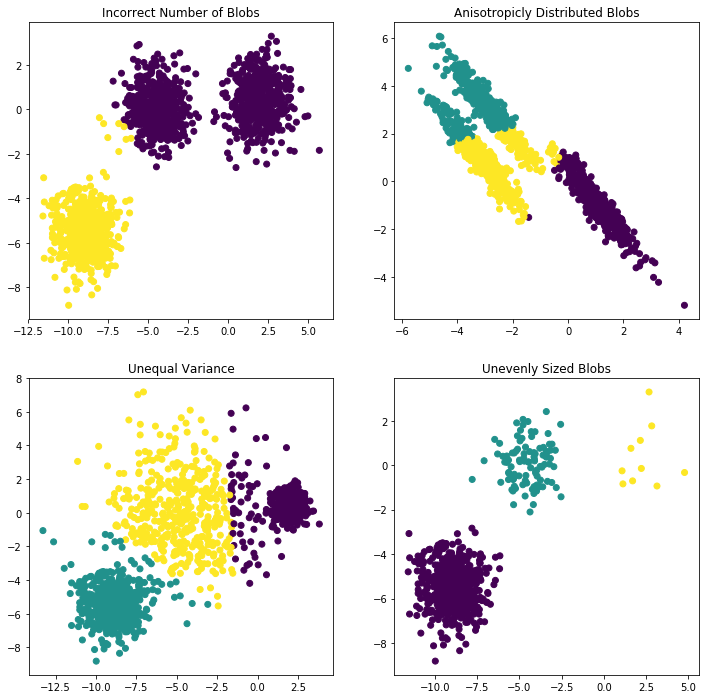

In [18]:
plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")

# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3,
                random_state=random_state).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")


<div class="alert alert-success">
    <b>EXERCISE: Polish flats dataset</b>:
     <ul>
      <li>
      Perform K-means clustering on the digits data. Determine the probable number of clusters.
      </li>
      <li>
      What do the clusters mean? Perform summary statistics (for instance, grouping per cluster) to see if you can find some patterns.
      </li>
    </ul>
</div>